# Optimizing behaviour in Bertrand and Cournot competition

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [6]:
import numpy as np
from scipy import optimize
from numpy import array 
from scipy import arange
import sympy as sm
from scipy.optimize import minimize
import matplotlib.pyplot as plt


# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 

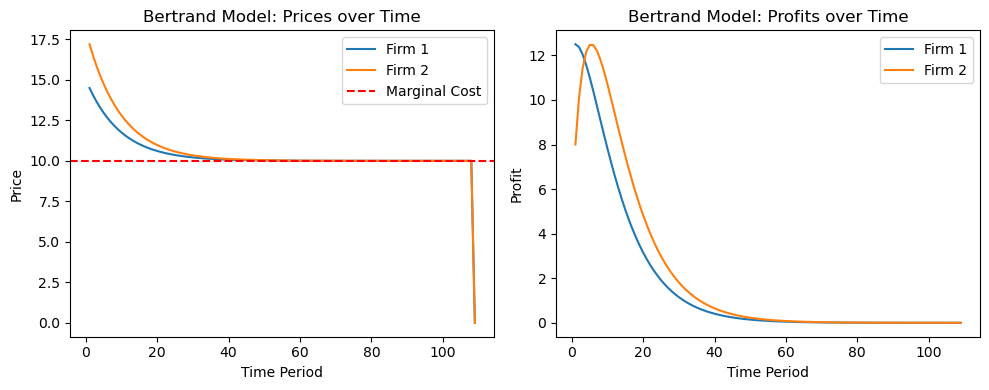

Equilibrium Period: 108


In [2]:
from modelproject import run_bertrand_model

run_bertrand_model()

# The Cournot model
Cournot competition is a game between a finite number of firms supplying the same good. In contrary to perfect competition all the individual suppliers have market power that enable them to effect prices in the market through the quantity produced. The market will clear at any quantity supplied through the mechanism of lowering prices.

In a market with $n$ firms, where firm $i\in[1,2,...,n]$, we have a price function depending on the quantities produced $p(q_1,q_2,...,q_n)$ where
$$\frac{\partial p(q_1,q_2,...,q_n)}{\partial q_i}=\frac{\partial p(q_1,q_2,...,q_n)}{\partial q_j}<0$$
Every firm has constant and identical marginal costs $(c_i=c_j=c)$. Firm $i$ will choose $q_i$ in order to maximize the profit function
$$\pi(q_i)=p(q_1,q_2,...,q_n)q_i-cq_i$$

In [15]:
def run_cournot_model():
    # Set the parameters
    c = 10  # Marginal cost
    T = 100  # Number of periods
    a = 50 # Maximum quantity
    quantity_change = 0.1  # Quantity change after each period

    # Starting quantities for each firm 
    q1 = 15
    q2 = 13

    # Arrays to store quantities and profits over time
    quantities1 = np.zeros(T)
    quantities2 = np.zeros(T)
    profits1 = np.zeros(T)
    profits2 = np.zeros(T)

    # The objective function that we want to minimize
    def objective(quantities):
        q1, q2 = quantities
        p = a - q1 - q2  # Calculate the market price based on total quantity
        profit1 = (p - c) * q1
        profit2 = (p - c) * q2
        return -(profit1 + profit2)  # Negate the objective for maximization

    # Starting guesses
    initial_quantities = np.array([q1, q2])

    # We minimize the objective function
    result = minimize(objective, initial_quantities, method='SLSQP')

    # Retrieve the equilibrium quantities
    equilibrium_quantities = result.x

    # The repeated Cournot game
    for t in range(T):
        p = a - q1 - q2  # Calculate the market price based on total quantity
        profits1[t] = (p - c) * q1
        profits2[t] = (p - c) * q2
        
        # Update the quantities based on the quantity change and the difference with the optimal response
        q1 -= quantity_change * (q1 - equilibrium_quantities[0])
        q2 -= quantity_change * (q2 - equilibrium_quantities[1])
        
        # Store the current quantities
        quantities1[t] = q1
        quantities2[t] = q2

        # Print prices and quantities for each time period
        #print(f"Time Period {t+1}:")
        #print(f"Price: {p:.2f}")
        #print(f"Quantity - Firm 1: {q1:.2f}")
        #print(f"Quantity - Firm 2: {q2:.2f}")
        #print("")

    # Plot the quantities and profits over time
    time_periods = np.arange(1, T + 1)

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(time_periods, quantities1, label='Firm 1')
    plt.plot(time_periods, quantities2, label='Firm 2')
    plt.xlabel('Time Period')
    plt.ylabel('Quantity')
    plt.legend()
    plt.title('Cournot Model: Quantities over Time')

    plt.subplot(1, 2, 2)
    plt.plot(time_periods, profits1, label='Firm 1')
    plt.plot(time_periods, profits2, label='Firm 2')
    plt.xlabel('Time Period')
    plt.ylabel('Profit')
    plt.legend()
    plt.title('Cournot Model: Profits over Time')

    plt.tight_layout()
    plt.show()

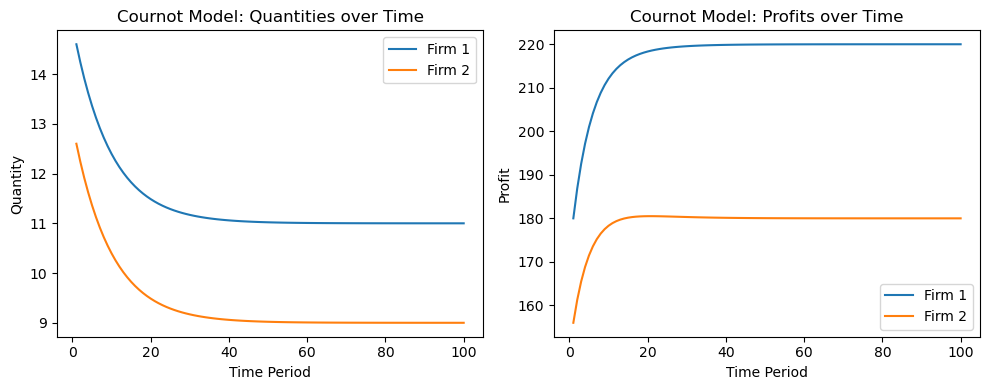

In [16]:
run_cournot_model()